In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
pima= pd.read_csv('diabetes.csv')

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
features= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
x = pima[features]
y = pima.Outcome

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=1)

In [6]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
pima[pima.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [9]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [10]:
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.7056277056277056


In [11]:
!pip install graphviz

In [12]:
!pip install pydotplus

In [13]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

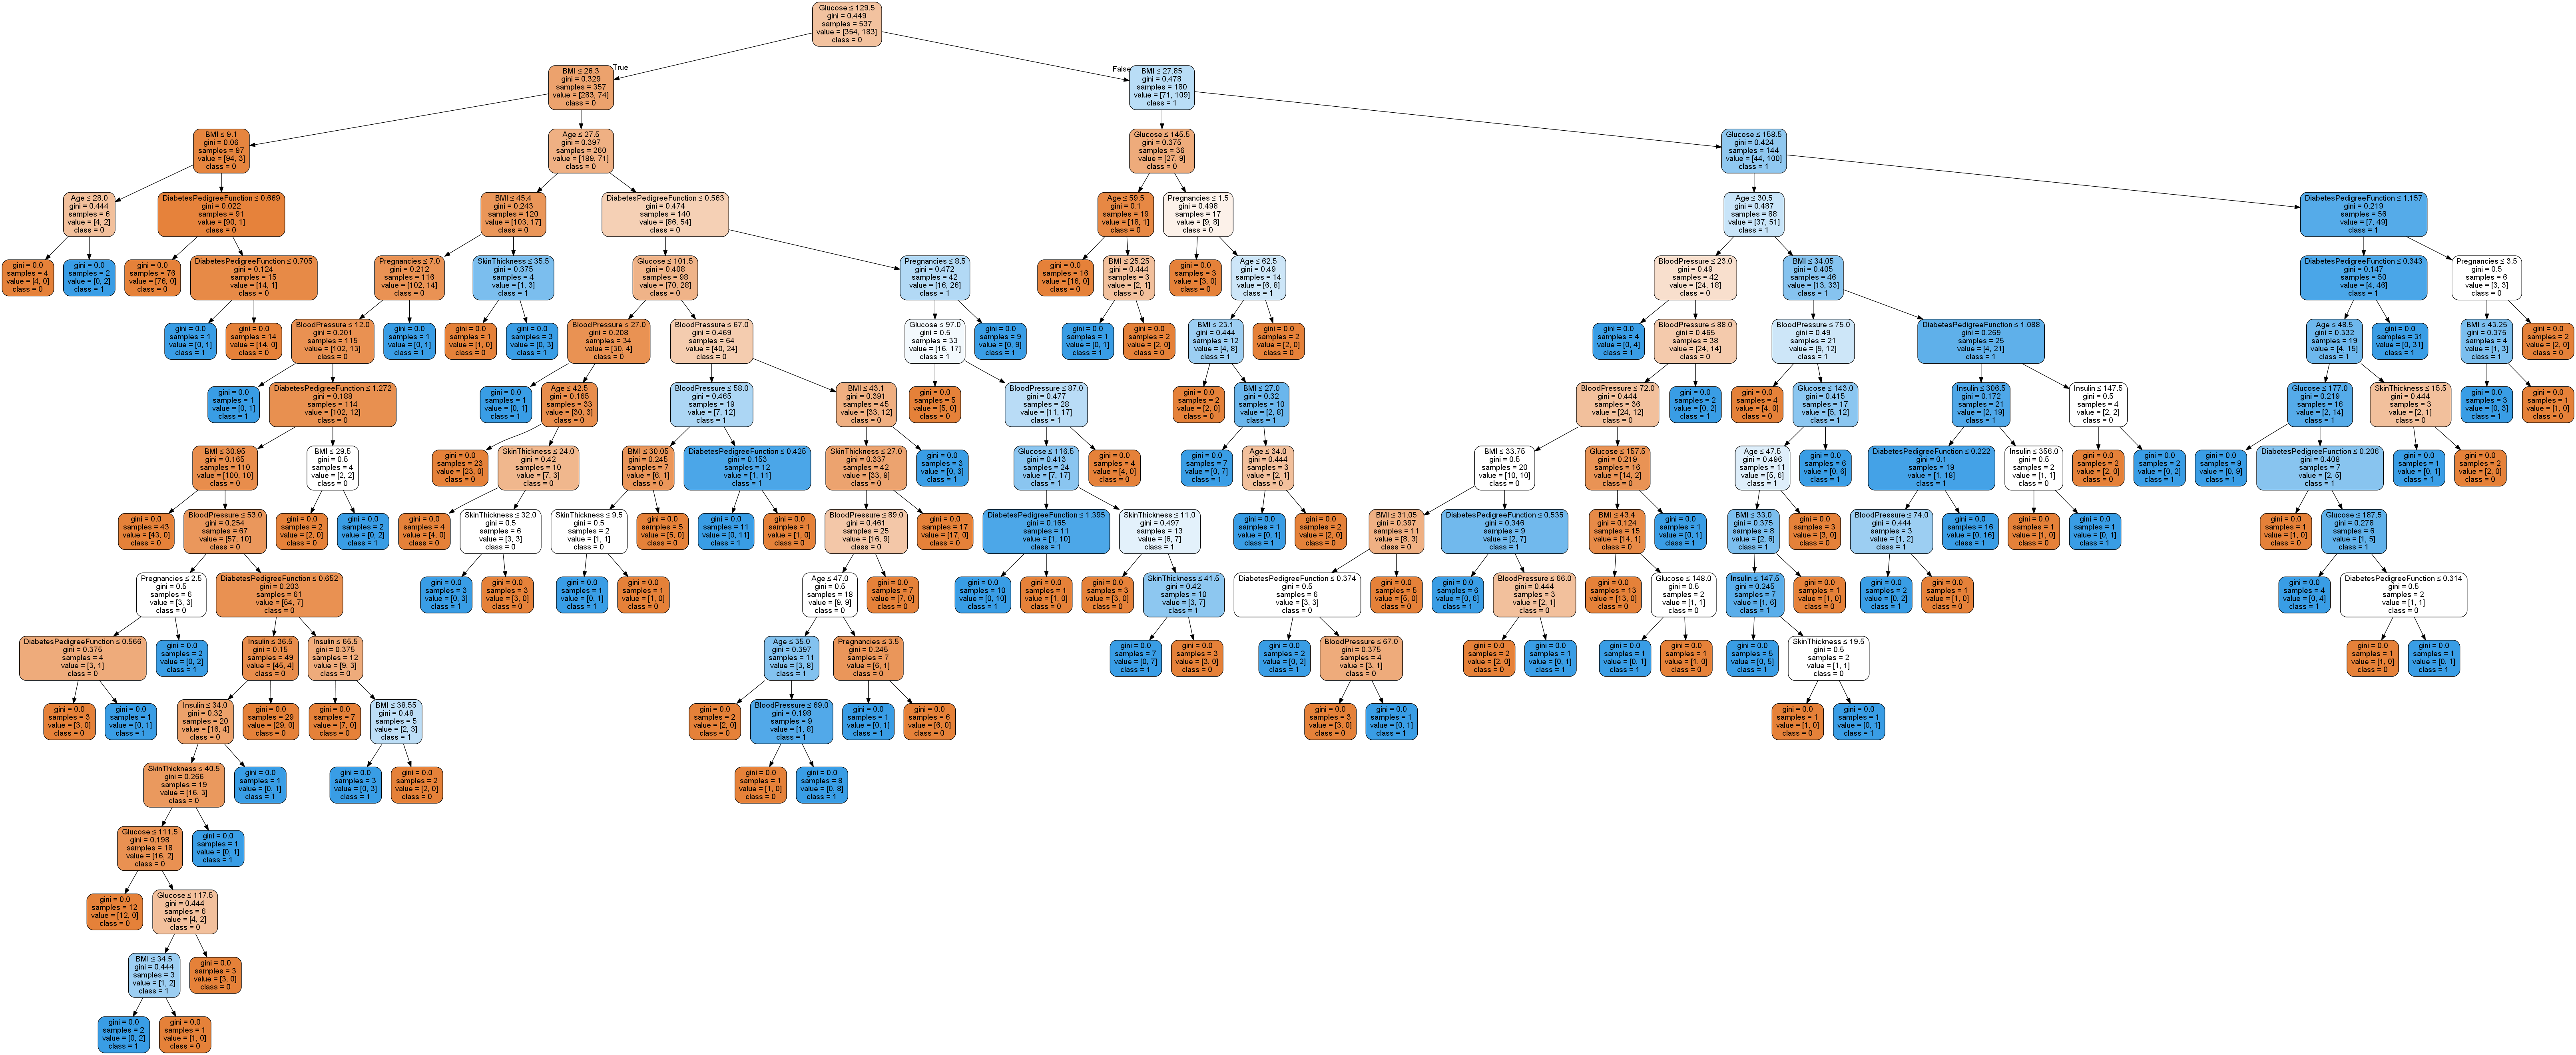

In [14]:
dot_data= StringIO()
export_graphviz(clf,
               out_file=dot_data,
               filled=True,
               rounded=True,
               special_characters=True,
               feature_names=features,
               class_names=['0','1'])

graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [15]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.7835497835497836


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(n_estimators=200)
clf_rf.fit(x_train, y_train)
y_pred= clf_rf.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.8008658008658008


In [17]:
from sklearn.svm import SVC
clf_svm= SVC()
clf_svm.fit(x_train, y_train)
y_pred= clf_svm.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.6320346320346321


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std= scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size= 0.3, random_state=1)
clf_svm2= SVC(C=5)
clf_svm2.fit(x_train, y_train)
y_pred= clf_svm2.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.7835497835497836


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
